# 6.2 Exploring Relationships


### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

## 1. import libraries and data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.2'

In [3]:
%matplotlib inline

In [4]:
# Define path
path = r'/Users/sydneyhoy/Documents/Data Immersion/Achievement 6/World Life Expectancy Analysis'

In [5]:
# Import dataset
life_expectancy = pd.read_csv(os.path.join(path, '02 Data', 'Original', 'LifeExpectancy cleaned.csv'))

## 2. Data Cleaning

In [6]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2700 non-null   object 
 1   Year                             2700 non-null   int64  
 2   Status                           2700 non-null   object 
 3   Life expectancy                  2700 non-null   float64
 4   Adult Mortality                  2700 non-null   int64  
 5   infant deaths                    2700 non-null   int64  
 6   Alcohol                          2700 non-null   float64
 7   percentage expenditure           2700 non-null   float64
 8   Measles                          2700 non-null   int64  
 9    BMI                             2700 non-null   float64
 10  under-five deaths                2700 non-null   int64  
 11  Polio                            2700 non-null   int64  
 12  Total expenditure   

#### Mixed Data Types

In [7]:
# check for mixed data typed
for col in life_expectancy.columns.tolist():
  weird = (life_expectancy[[col]].map(type) != life_expectancy[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (life_expectancy[weird]) > 0:
    print (col)

no mixed type data

#### Duplicate Values

In [8]:
# check for duplicates
life_expectancy_dups = life_expectancy[life_expectancy.duplicated()]

In [9]:
life_expectancy_dups

Empty DataFrame
Columns: [Country, Year, Status, Life expectancy, Adult Mortality, infant deaths, Alcohol, percentage expenditure, Measles ,  BMI , under-five deaths , Polio, Total expenditure, Diphtheria ,  HIV/AIDS, GDP, Population,  thinness  1-19 years,  thinness 5-9 years, Income composition of resources]
Index: []

no duplicates

#### Missing Values

In [10]:
# check null values
life_expectancy.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
dtype: int64

no null values

#### Renaming Columns

In [11]:
# rename columns for consistency
life_expectancy.rename(columns = {'Life expectancy' : 'life_expectancy', 'Adult Mortality': 'adult_mortality', 
                     'infant deaths': 'infant_deaths', 'percentage expenditure': 'percentage_expenditure',
                     'Measles': 'measles_cases', ' BMI ' : 'BMI', 'under-five deaths' : 'under_five_deaths', 
                     'Diphtheria' : 'diphtheria_immunizations', ' HIV/AIDS': 'HIV/AIDS_deaths',
                     'Population' : 'population', ' thinness 1-19 years ' : 'thinness_1-19_years', 
                     ' thinness 5-9 years' : 'thinness_5-9_years', 'Income composition of resources' : 'income_composition_of_resources',
                     'Country' : 'country', 'Year' : 'year', 'Status' : 'status', 'Alcohol' : 'alcohol', 'Polio' : 'polio_immunizations'},
                      inplace = True)

In [12]:
# drop column because duplicate information in percentage expenditure
life_expectancy = life_expectancy.drop(columns = ['Total expenditure'])

In [13]:
life_expectancy.to_csv(os.path.join(path, '02 Data','Prepared', 'life_expectancy_clean.csv'))

In [14]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2700 non-null   object 
 1   year                             2700 non-null   int64  
 2   status                           2700 non-null   object 
 3   life_expectancy                  2700 non-null   float64
 4   adult_mortality                  2700 non-null   int64  
 5   infant_deaths                    2700 non-null   int64  
 6   alcohol                          2700 non-null   float64
 7   percentage_expenditure           2700 non-null   float64
 8   Measles                          2700 non-null   int64  
 9   BMI                              2700 non-null   float64
 10  under-five deaths                2700 non-null   int64  
 11  polio_immunizations              2700 non-null   int64  
 12  Diphtheria          

## 3. Exploring Relationships

### Correlations


In [15]:
# remove columns not necessary for correlation
life_expectancy2 = life_expectancy.drop(columns = ['country', 'status','year']) 

In [16]:
# Create a correlation matrix using matplotlip
life_expectancy2.corr()


life_expectancy  adult_mortality  \
life_expectancy                         1.000000        -0.687925   
adult_mortality                        -0.687925         1.000000   
infant_deaths                          -0.195282         0.073742   
alcohol                                 0.396755        -0.187157   
percentage_expenditure                  0.398653        -0.248194   
Measles                                -0.162035         0.029598   
BMI                                     0.566529        -0.385209   
under-five deaths                      -0.220515         0.088383   
polio_immunizations                     0.442380        -0.252903   
Diphtheria                              0.457356        -0.255996   
HIV/AIDS_deaths                        -0.570447         0.533614   
GDP                                     0.473713        -0.305697   
population                              0.004459        -0.030804   
 thinness  1-19 years                  -0.476378         0.301072   
thinness_5-9_years                     -0.470949         0.307071   
income_composition_of_resources         0.703825        -0.442465   

                                 infant_deaths   alcohol  \
life_expectancy                      -0.195282  0.396755   
adult_mortality                       0.073742 -0.187157   
infant_deaths                         1.000000 -0.114858   
alcohol                              -0.114858  1.000000   
percentage_expenditure               -0.088395  0.339850   
Measles                               0.491931 -0.050976   
BMI                                  -0.227892  0.332826   
under-five deaths                     0.996773 -0.110936   
polio_immunizations                  -0.170329  0.215622   
Diphtheria                           -0.174567  0.216647   
HIV/AIDS_deaths                       0.024210 -0.052536   
GDP                                  -0.110891  0.386927   
population                            0.521479 -0.014812   
 thinness  1-19 years                 0.463501 -0.429914   
thinness_5-9_years                    0.469375 -0.418671   
income_composition_of_resources      -0.151512  0.465284   

                                 percentage_expenditure  Measles        BMI  \
life_expectancy                                0.398653 -0.162035  0.566529   
adult_mortality                               -0.248194  0.029598 -0.385209   
infant_deaths                                 -0.088395  0.491931 -0.227892   
alcohol                                        0.339850 -0.050976  0.332826   
percentage_expenditure                         1.000000 -0.059885  0.245355   
Measles                                       -0.059885  1.000000 -0.177740   
BMI                                            0.245355 -0.177740  1.000000   
under-five deaths                             -0.090498  0.500347 -0.238042   
polio_immunizations                            0.151397 -0.138769  0.275374   
Diphtheria                                     0.148345 -0.144172  0.273423   
HIV/AIDS_deaths                               -0.104758  0.031151 -0.246966   
GDP                                            0.856856 -0.080804  0.313386   
population                                    -0.046857  0.236776 -0.048603   
 thinness  1-19 years                         -0.261656  0.219477 -0.533657   
thinness_5-9_years                            -0.263224  0.215826 -0.540310   
income_composition_of_resources                0.381708 -0.139707  0.505579   

                                 under-five deaths   polio_immunizations  \
life_expectancy                           -0.220515             0.442380   
adult_mortality                            0.088383            -0.252903   
infant_deaths                              0.996773            -0.170329   
alcohol                                   -0.110936             0.215622   
percentage_expenditure                    -0.090498             0.151397   
Measles                               

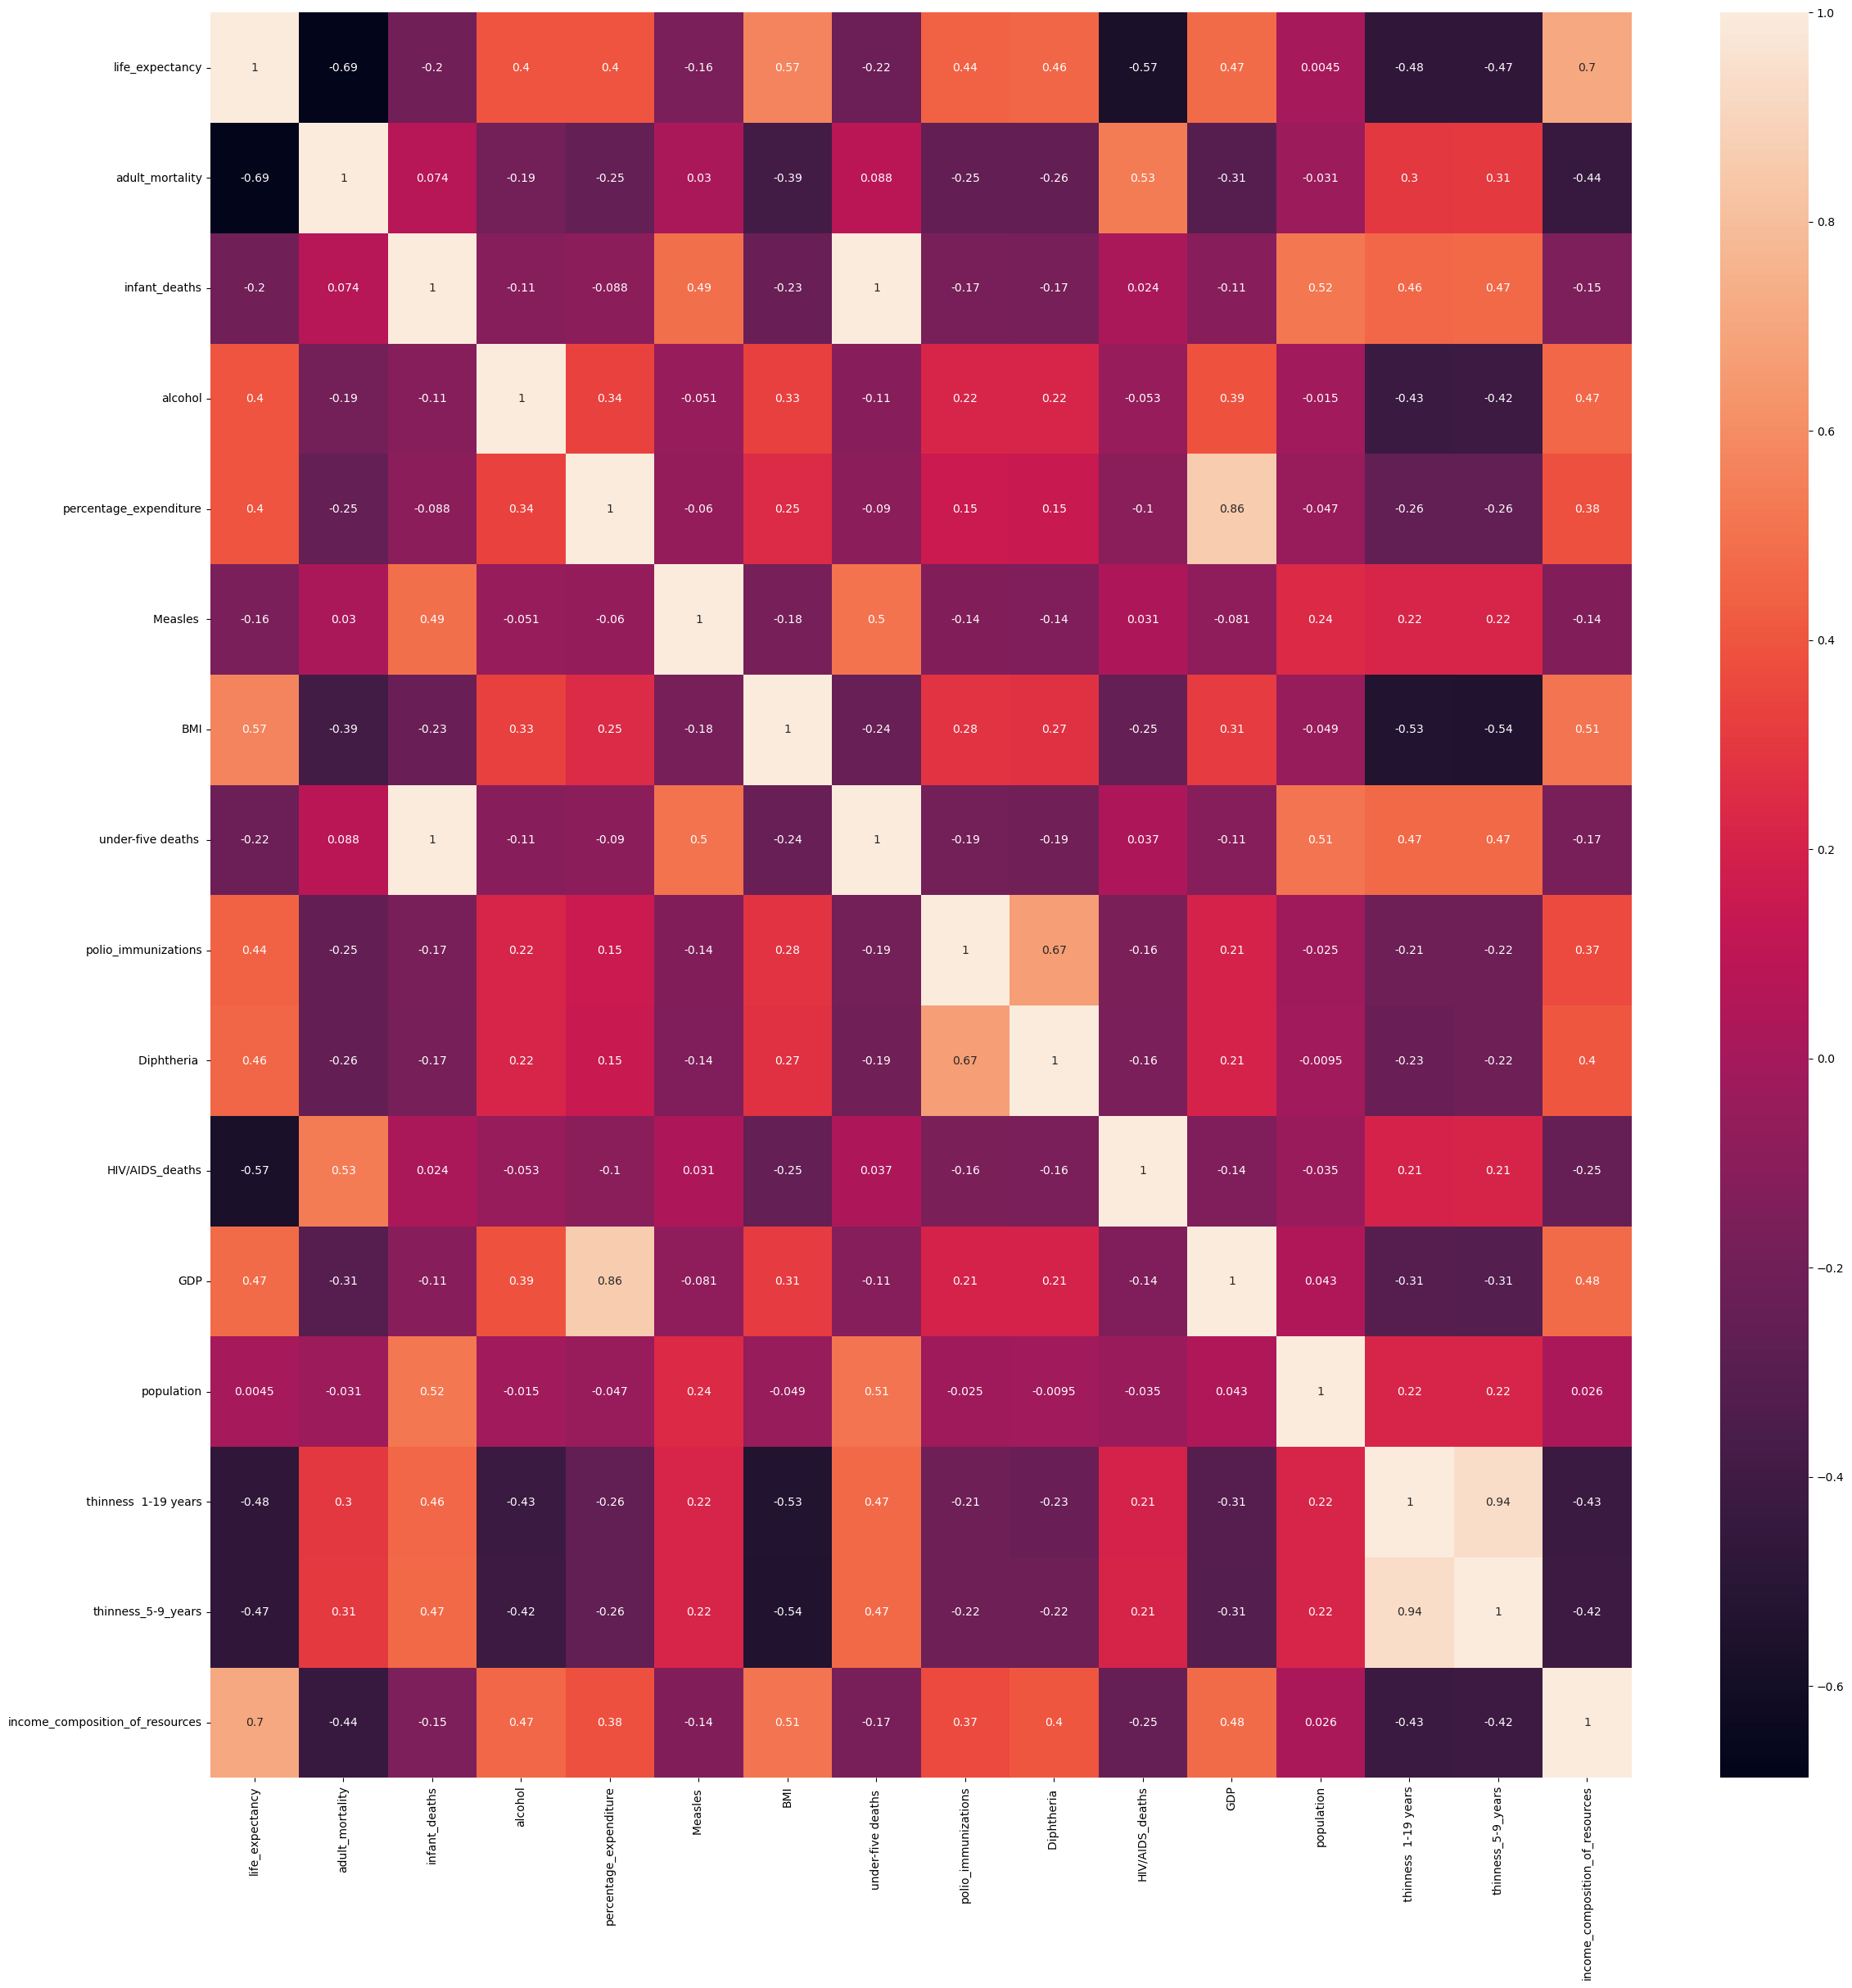

In [17]:
#create a correlation matrix using seaborn
f,ax = plt.subplots(figsize=(28,28))
life_expectancy_corr = sns.heatmap(life_expectancy2.corr(), annot = True, ax = ax) 

3. There is a lot of data here but there are some correlations that stick out to me. 
There is a relatively strong correlation between BMI and life expectancy showing that the higher the average BMI of a country the higher its life expectancy. 
There is a weak negative correlation between infant deaths, measles cases, and under five deaths and life expectancy telling me that the higher these are the lower life expectancy for that country. 
There is a very strong correlation between income composition of resources and life expectancy this number has to do with the human development index which shows that if the HDI is high than life expectancy is high.

In [18]:
# export heat map
life_expectancy_corr.figure.savefig(os.path.join(path, '04 Analysis','life_expectancy_heat2.png'))

#### Scatterplots

In [19]:
life_expectancy.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'Measles ', 'BMI',
       'under-five deaths ', 'polio_immunizations', 'Diphtheria ',
       'HIV/AIDS_deaths', 'GDP', 'population', ' thinness  1-19 years',
       'thinness_5-9_years', 'income_composition_of_resources'],
      dtype='object')

/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


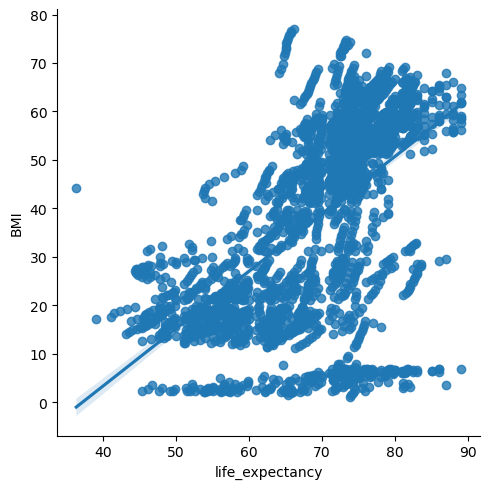

In [20]:
# Create a scatterplot for the "life_expectancy" and "BMI" columns in seaborn

sns.lmplot(x = 'life_expectancy', y = 'BMI', data = life_expectancy2)

4a. this plot shows the relationship between BMI and life expectancy. There are a few outliers but the plot shows a strong positive correlation between these two variables. According to the data countries with a higher average BMI have a higher life expectancy.

/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


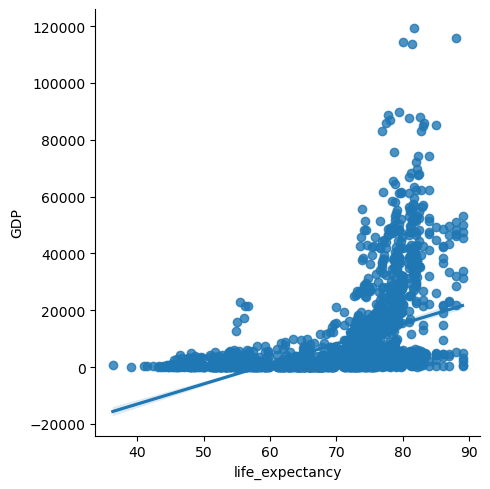

In [21]:
# Create a scatterplot for the "life_expectancy" and "GDP" columns in seaborn

sns.lmplot(x = 'life_expectancy', y = 'GDP', data = life_expectancy2)

4b. This plot shows that relationship between GDP and life expectancy. The trend line here is not very steep but there is a significant upward trend once life expectancy reaches 70.

/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


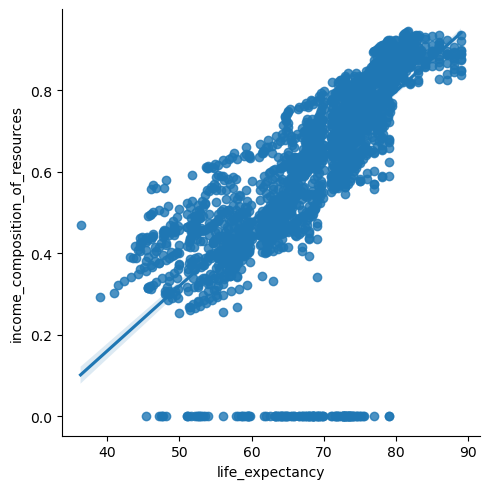

In [22]:
# Create a scatterplot for the "life_expectancy" and "income_composition_of_resources" columns in seaborn

sns.lmplot(x = 'life_expectancy', y = 'income_composition_of_resources', data = life_expectancy2)

4c. This scatterplot shows a very strong relationship between life expectancy and income composition of resources, which has to do with the human development index. There arevery few outliers and some point at 0 which may be due to some unavailable data. Othereise the data points are very tightly aligned with the trend line. So this may show that the income composition of resources plays a large role in life expectancy.

#### Pair Plots

/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

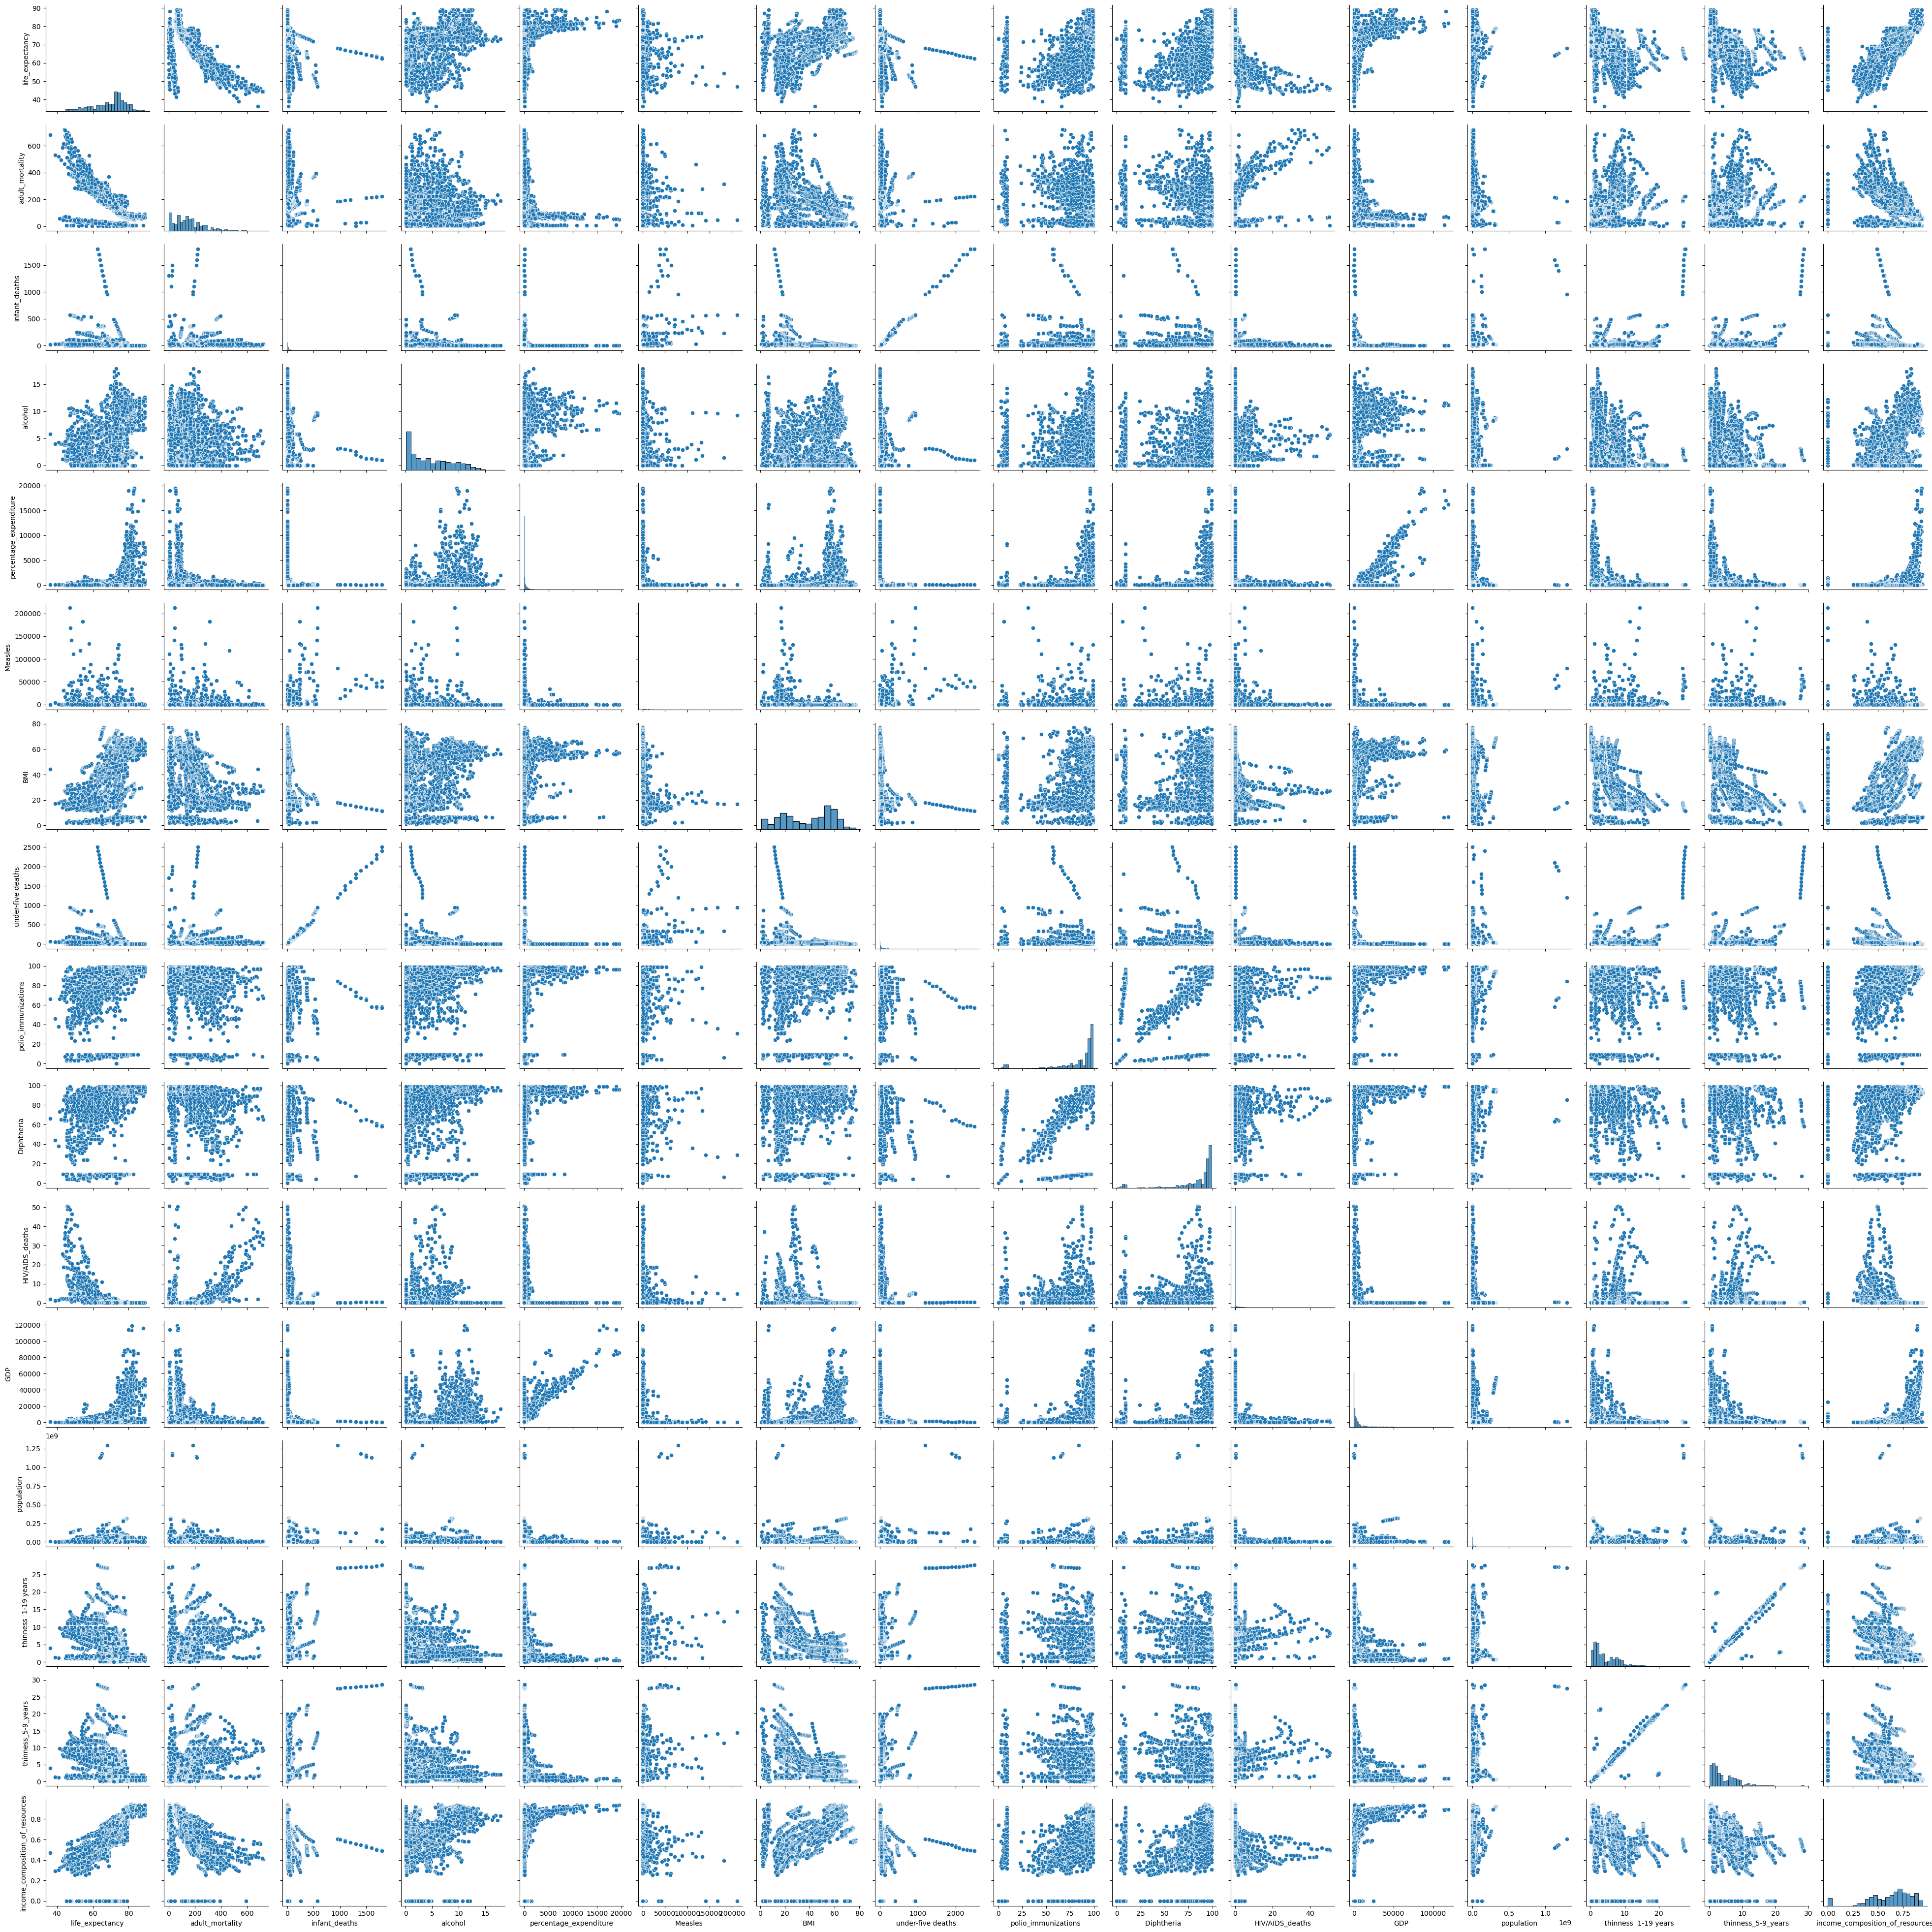

In [23]:
# Create a pair plot 

g = sns.pairplot(life_expectancy2)

5. there is a lot of information here, most of the distibutions seem random but there are some interesting relationships between Measles, diptheria, and polio. Also there are some relationships between income composition of resources and the rest of the variables that are worth looking into. 

#### Categorical Plots

/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='life_expectancy', ylabel='Count'>

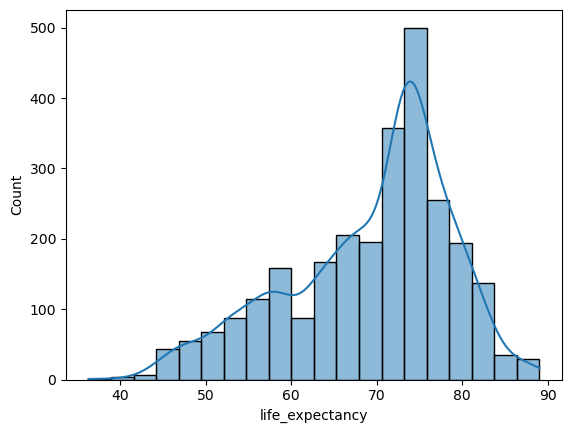

In [24]:
# Create histogram to view distribution to create categories
sns.histplot(life_expectancy['life_expectancy'], bins = 20, kde = True)

In [25]:
life_expectancy.loc[life_expectancy['life_expectancy'] < 65, 'Age Category'] = 'Low life expectancy'

In [26]:
life_expectancy.loc[(life_expectancy['life_expectancy'] >= 65) & (life_expectancy['life_expectancy'] < 75), 'Age Category'] = 'Mid life expectancy'

In [27]:
life_expectancy.loc[life_expectancy['life_expectancy'] >= 75, 'Age Category'] = 'High life expectancy'

In [28]:
life_expectancy['Age Category'].value_counts(dropna = False)

Age Category
Mid life expectancy     1150
High life expectancy     784
Low life expectancy      766
Name: count, dtype: int64

/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


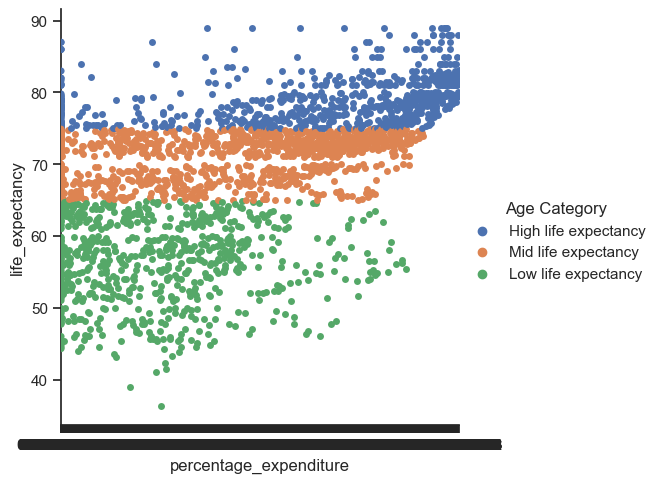

In [29]:
# Create a categorical plot in seaborn 

sns.set(style="ticks")
g = sns.catplot(x="percentage_expenditure", y="life_expectancy", hue="Age Category", data=life_expectancy)

6. With this categorical plot I wanted to explore the correlation between percentage expenditure which is the expenditure on health as a percentage of GDP and life expectancy. There was not a strong correlation in the heat map but I wanted a closer look. This categorical plot shows that while the relationship is not strong there is more grouping of low life expectancy on the lower side of percentage expenditure and high life expectancy on the higher percentage expenditure but there are a lot of outliers making this a fairly weak correlation. 

In [30]:
# export categorical plot
g.figure.savefig(os.path.join(path, '04 Analysis','life_expectancy_cat.png'))

7. Answering Questions

    a. Does GDP indicate a high life expectancy?
    
        Yes, there seems to be a correlation between a high GDP and life expectancy.
        
    b. Does health expenditure indicate a high life expectancy?
    
        There is a slight correlation but expenditure does not fully indicate a high life expectancy.
        
    c. Does HDI indicate a high life expectancy?
    
        Yes, There is a very strong correaltion between income composition of resources and life expectancy.
        
    d. Does population effect life expectancy positively or negatively?
    
        Population does not seem to effect life expectancy at all.



8. Hypothesis
    
    Developing countries have a lower life expectancy.
    
    Life expectancy is largely affected by a countries income composition of resources.
    
    Developing countries are more likely to contract HIV/AIDS and measles.
    
    Developed countries are more likely to recieve and vaccination polio and diphtheria.